In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import zipfile

In [ ]:
!wget --no-check-certificate \
  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip \
  -O /content/kagglecatsanddogs_3367a.zip

--2021-01-10 07:57:52--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.106.8.114, 2600:1408:7400:5a0::e59, 2600:1408:7400:588::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.106.8.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/content/kagglecatsanddogs_3367a.zip’

/content/kagglecats 100%[===================>] 786.68M  86.3MB/s    in 9.9s    

2021-01-10 07:58:02 (79.3 MB/s) - ‘/content/kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [ ]:
local_zip = '/content/kagglecatsanddogs_3367a.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
! pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio("/content/PetImages", output="/content/", seed=1337, ratio=(.7, .2, .1), group_prefix=None) # default values

Copying files: 25002 files [00:04, 5984.85 files/s]


In [ ]:
import glob,os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
import os,glob
from keras import applications

In [ ]:
def get_files(dir):
  if not os.path.exists(dir):
    return 0
  count = 0
  for current_path,dirs,files in os.walk(dir):
    for dr in dirs:
      count += len(glob.glob(os.path.join(current_path,dr +'/*')))
  return count

In [ ]:
data_training = get_files('/content/train')
data_val = get_files('/content/val')
data_test = get_files('/content/test')
num_classes = len(glob.glob('/content/train' + "/*"))

print('jumlah data training :',data_training)
print('jumlah data val :',data_val)
print('jumlah data test :',data_test)
print('jumlah keals dataset :',num_classes)

jumlah data training : 17495
jumlah data val : 5000
jumlah data test : 2502
jumlah keals dataset : 2


In [ ]:
train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

In [ ]:
import warnings
import os
from PIL import Image
folder_path = test_dir
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
       # Cause all warnings to always be triggered.
        try:
          file_path = os.path.join(sub_folder_path, filee)
          print('** Path: {}  **'.format(file_path), end="\r", flush=True)
          im = Image.open(file_path)
          rgb_im = im.convert('RGB')
          warnings.filterwarnings('error')
        except:
          os.remove(sub_folder_path + '/' +filee)

Exception ignored in: <_io.FileIO name='/content/test/Dog/6718.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/test/Dog/10797.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/test/Dog/3288.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/test/Dog/2688.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/test/Dog/7133.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/test/Cat/3491.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/test/Cat/850.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/test/Cat/9171.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/test/Cat/10404.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/test/Cat/11210.jpg' mode='rb' closefd=True>


Exception ignored in: <_io.FileIO name='/content/test/Cat/660.jpg' mode='rb' closefd=True>


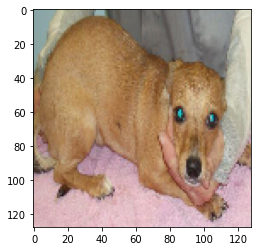

In [ ]:
from keras.preprocessing import image
import numpy as np

img1 = image.load_img('/content/train/Dog/10034.jpg',target_size=(128,128))
plt.imshow(img1)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

val_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=64,
        class_mode='binary',
        color_mode='rgb',
        interpolation='nearest')

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=64,
        class_mode='binary',
        color_mode='rgb',
        interpolation='nearest')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        color_mode = 'rgb',
        shuffle=False
        )

Found 17495 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 2502 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten
from keras.utils import plot_model
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization,Dropout,AveragePooling2D,BatchNormalization

In [ ]:
model = Sequential()

model.add(Conv2D(128, (3,3), input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', strides=1, activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [ ]:
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
batch_size = 64

train = model.fit(train_generator,
                            epochs=30,
                            steps_per_epoch = train_generator.samples // batch_size,
                            validation_data = val_generator,
                            validation_steps = val_generator.samples // batch_size,
                            verbose = 1)

Epoch 1/30
273/273 [==============================] - 138s 503ms/step - loss: 0.7369 - accuracy: 0.5391 - val_loss: 0.6584 - val_accuracy: 0.5881
Epoch 2/30
273/273 [==============================] - 138s 504ms/step - loss: 0.6331 - accuracy: 0.6410 - val_loss: 0.5957 - val_accuracy: 0.6887
Epoch 3/30
273/273 [==============================] - 137s 503ms/step - loss: 0.5715 - accuracy: 0.7041 - val_loss: 0.5461 - val_accuracy: 0.7284
Epoch 4/30
273/273 [==============================] - 137s 502ms/step - loss: 0.5195 - accuracy: 0.7431 - val_loss: 0.5397 - val_accuracy: 0.7202
Epoch 5/30
273/273 [==============================] - 136s 497ms/step - loss: 0.5069 - accuracy: 0.7554 - val_loss: 0.5023 - val_accuracy: 0.7562
Epoch 6/30
273/273 [==============================] - 135s 496ms/step - loss: 0.4730 - accuracy: 0.7733 - val_loss: 0.4849 - val_accuracy: 0.7632
Epoch 7/30
273/273 [==============================] - 135s 496ms/step - loss: 0.4703 - accuracy: 0.7833 - val_loss: 0.4529 -

In [ ]:
model.save('catdog2.h5')

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('/content/catdog2.h5')

In [ ]:
import pandas as pd
test_generator.reset
ytesthat = model.predict(test_generator)
df = pd.DataFrame({
    'filename':test_generator.filenames,
    'predict2':ytesthat[:,0],
    'y':test_generator.classes
})

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict2']>0.5
df.y_pred = df.y_pred.astype(int)
df

,filename,predict2,y,y_pred
0,Cat/1.jpg,0.00000,0,0
1,Cat/10.jpg,0.01902,0,0
2,Cat/10018.jpg,0.01772,0,0
3,Cat/1002.jpg,0.00001,0,0
4,Cat/10027.jpg,0.00367,0,0
...,...,...,...,...
2497,Dog/9935.jpg,0.59619,1,1
2498,Dog/9949.jpg,0.99876,1,1
2499,Dog/9964.jpg,1.00000,1,1
2500,Dog/9977.jpg,0.00068,1,0


In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 2502 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 2502 Validation images : 310


In [ ]:
! pip install numpy==1.16.1 

     |████████████████████████████████| 17.3MB 219kB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.1 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement numpy~=1.19.2, but you'll have numpy 1.16.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4


Exception ignored in: <_io.FileIO name='/usr/local/lib/python3.6/dist-packages/numpy-1.16.1.dist-info/top_level.txt' mode='rb' closefd=True>


In [ ]:
#Prediction of test set
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

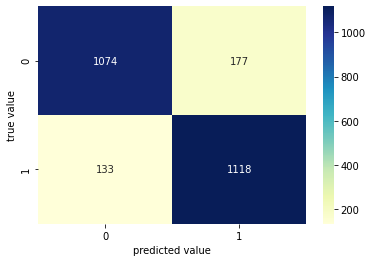

In [ ]:
conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
actual = test_generator.classes
actual

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predicted = model.predict_classes(test_generator, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


79/79 [==============================] - 7s 84ms/step


In [ ]:
predicts = predicted.flatten()

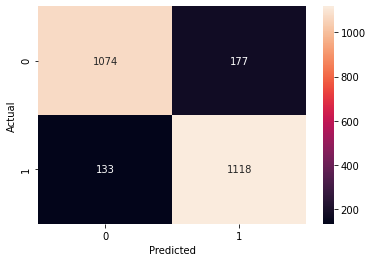

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


data = {'y_Actual':    actual,
        'y_Predicted': predicts
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='.0f')
plt.show()

In [ ]:
Classes = ['Cat','Dog'
            ]

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

import numpy as np

def prepare(img_path):
  img = image.load_img(img_path, target_size=(128,128,3), color_mode='rgb')
  x = image.img_to_array(img)
  x = x/255
  return np.expand_dims(x, axis=0)

In [ ]:
citra_test = '/content/kucing-wallpaper-1200x675.jpg'

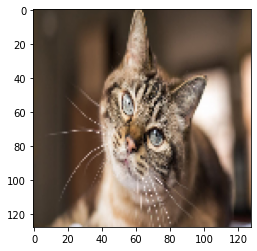

In [ ]:
imgs = image.load_img(citra_test, target_size=(128,128,3), color_mode='rgb')
plt.imshow(imgs)

In [ ]:
hasil_akhir = model.predict_classes(prepare(citra_test))
hasil_akhir_2 = model.predict(prepare(citra_test))
index = np.argsort(hasil_akhir_2[0,:])
print('          ', Classes[int(hasil_akhir)])

           Cat


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
